In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#pre-processing
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
df = pd.read_csv('HR Employee Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 1) Análise Exploratória:
- a) Mostrar no formato de violin plot a distribuição dos dados do atributo tipo de cargo ``JobRole``.

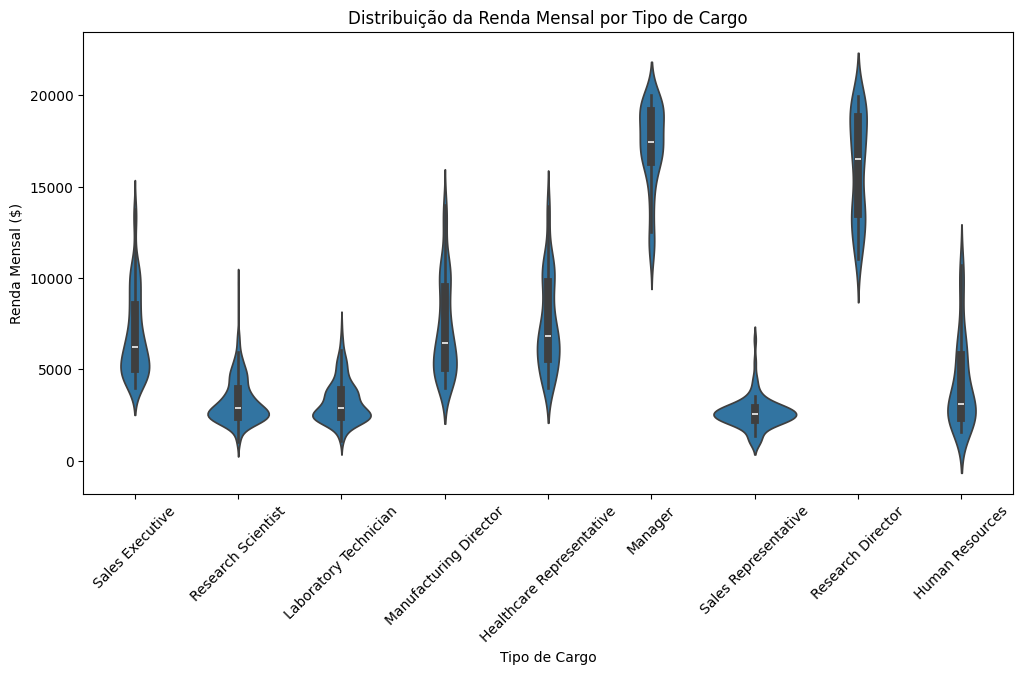

In [4]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='JobRole', y='MonthlyIncome', data=df)

plt.xticks(rotation=45)
plt.title('Distribuição da Renda Mensal por Tipo de Cargo')
plt.xlabel('Tipo de Cargo')
plt.ylabel('Renda Mensal ($)')

#plt.tight_layout()
plt.show()

# 1-b)
-  Apresentar a renda média mensal ``MonthlyIncome`` por escolaridade ``EducationField`` e desgaste ``Attrition``.
Utilizar Pandas Groupby.

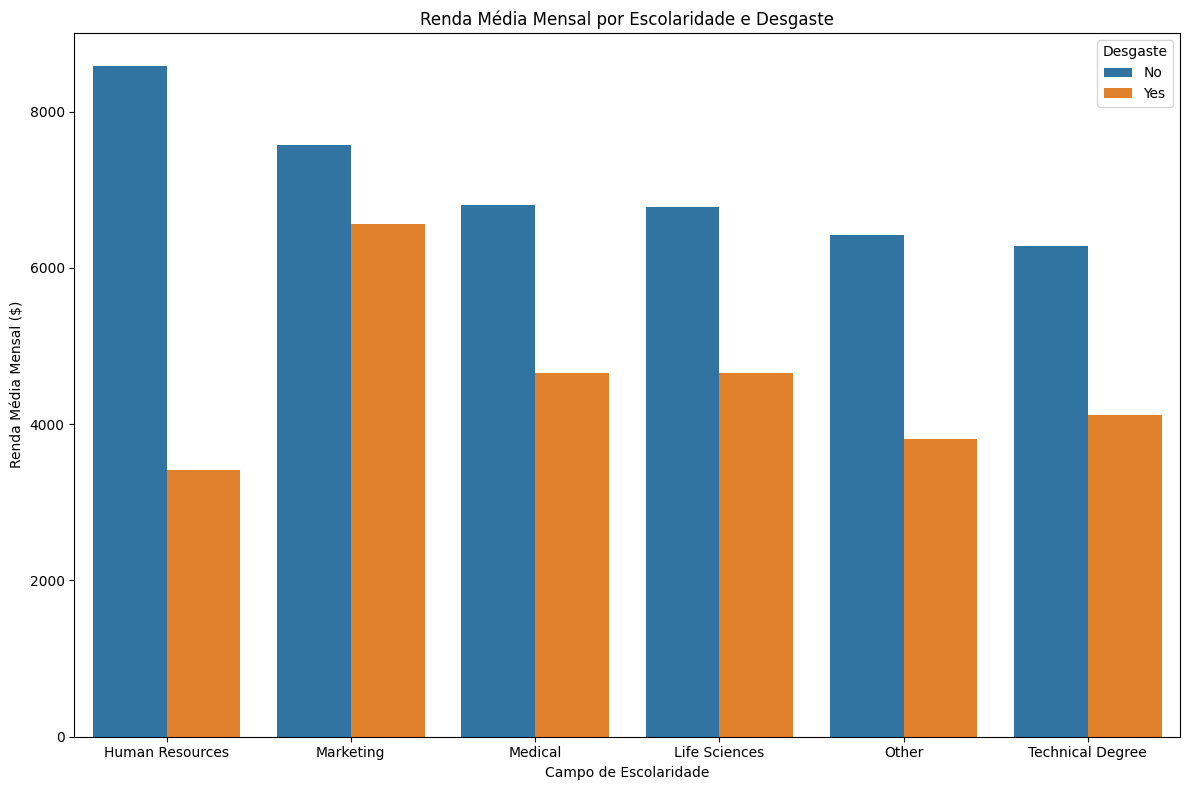

In [5]:
# Calculando a renda média mensal por escolaridade (EducationField) e desgaste (Attrition)
mean_monthly_income = df.groupby(['EducationField', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Ordenando os valores para o gráfico de barras
mean_monthly_income_sorted = mean_monthly_income.sort_values(by='MonthlyIncome', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='EducationField', y='MonthlyIncome', hue='Attrition', data=mean_monthly_income_sorted)

plt.title('Renda Média Mensal por Escolaridade e Desgaste')
plt.xlabel('Campo de Escolaridade')
plt.ylabel('Renda Média Mensal ($)')
plt.legend(title='Desgaste')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [6]:
# Analisar as variáveis to encode
categorical_columns = df.select_dtypes(include=['object']).columns

for categorical_feature in categorical_columns:
  print(f'{categorical_feature}: {df[categorical_feature].unique()}')

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [7]:
# no missing values
df.isna().any().any() 

False

In [8]:
#colunas irrelevantes
df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'],axis=1, inplace=True)

## Encoding categorical values

In [9]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [10]:
encoder = LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
scaler_cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [15]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


## Separating into X and y

In [16]:
y=df['Attrition'] 
X=df.drop(['Attrition'],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.feature_selection import SequentialFeatureSelector as SFS, RFE  

In [19]:
from feature_engine.selection import SmartCorrelatedSelection

In [20]:
# Define classifiers
classifiers = {
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100)
}

In [21]:
# Define feature selection techniques
feature_selection_techniques = {
    "Mutual Information": SelectKBest(mutual_info_classif, k=10),
    "ANOVA": SelectKBest(f_classif, k=10),
    'SmartCorrelatedGroups': SmartCorrelatedSelection(variables=None, method="pearson", threshold=0.8)
}

In [22]:
# Armazenamento dos pipelines
pipelines = {}
results = {}

# Loop through classifiers and feature selection techniques
for clf_name, clf in classifiers.items():
    for fs_name, fs in feature_selection_techniques.items():
        pipeline_name = f"{clf_name} with {fs_name}"
        # Define and fit pipeline
        pipeline = Pipeline([('feature_selection', fs), ('classifier', clf)])
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        
        # Calculate accuracy and print results
        acc = accuracy_score(y_test, pred)
        print(f"{pipeline_name} Accuracy: {acc}")
        results[pipeline_name] = acc
        
        # Store the fitted pipeline for later analysis
        pipelines[pipeline_name] = pipeline

DecisionTree with Mutual Information Accuracy: 0.7664399092970522
DecisionTree with ANOVA Accuracy: 0.7709750566893424
DecisionTree with SmartCorrelatedGroups Accuracy: 0.7619047619047619
KNN with Mutual Information Accuracy: 0.81859410430839
KNN with ANOVA Accuracy: 0.8253968253968254
KNN with SmartCorrelatedGroups Accuracy: 0.8299319727891157
RandomForest with Mutual Information Accuracy: 0.8458049886621315
RandomForest with ANOVA Accuracy: 0.8503401360544217
RandomForest with SmartCorrelatedGroups Accuracy: 0.8412698412698413


## Métricas de avaliação

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [24]:
# Initialize a dictionary to store predictions
predictions = {}

# Assuming the loop and pipeline setup from the previous response here
# After fitting each pipeline, store predictions
for clf_name, clf in classifiers.items():
    for fs_name, fs in feature_selection_techniques.items():
        pipeline_name = f"{clf_name} with {fs_name}"
        # Fit and predict inside the loop as before
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        predictions[pipeline_name] = pred  # Store predictions

# Now, calculate and print metrics for each set of predictions
for name, pred in predictions.items():
    print(f">> Metrics for: {name}")
    print("ACC: {:.3f}".format(accuracy_score(y_test, pred)))
    print("Recall: {:.2f}".format(recall_score(y_test, pred, average='binary')))
    print("Precision: {:.2f}".format(precision_score(y_test, pred, average='binary')))
    print("F1-score: {:.2f}".format(f1_score(y_test, pred, average='binary')))
    print()  # Print a blank line for readability

>> Metrics for: DecisionTree with Mutual Information
ACC: 0.841
Recall: 0.12
Precision: 0.82
F1-score: 0.20

>> Metrics for: DecisionTree with ANOVA
ACC: 0.837
Recall: 0.10
Precision: 0.73
F1-score: 0.18

>> Metrics for: DecisionTree with SmartCorrelatedGroups
ACC: 0.834
Recall: 0.12
Precision: 0.64
F1-score: 0.20

>> Metrics for: KNN with Mutual Information
ACC: 0.841
Recall: 0.13
Precision: 0.77
F1-score: 0.22

>> Metrics for: KNN with ANOVA
ACC: 0.848
Recall: 0.17
Precision: 0.81
F1-score: 0.28

>> Metrics for: KNN with SmartCorrelatedGroups
ACC: 0.837
Recall: 0.12
Precision: 0.69
F1-score: 0.20

>> Metrics for: RandomForest with Mutual Information
ACC: 0.846
Recall: 0.16
Precision: 0.80
F1-score: 0.26

>> Metrics for: RandomForest with ANOVA
ACC: 0.834
Recall: 0.12
Precision: 0.64
F1-score: 0.20

>> Metrics for: RandomForest with SmartCorrelatedGroups
ACC: 0.837
Recall: 0.12
Precision: 0.69
F1-score: 0.20



## Similaridade das Features

In [25]:
features_by_selector = {}

for name, pipeline in pipelines.items():
    print(f"Processing pipeline: {name}")  # Debug print to show which pipeline is currently being processed
    feature_selection_step = pipeline.named_steps['feature_selection']
    if hasattr(feature_selection_step, 'get_feature_names_out'):
        # For methods that directly support
        feature_names = feature_selection_step.get_feature_names_out(input_features=X_train.columns)
    elif hasattr(feature_selection_step, 'get_support'):
        # For methods that provide a boolean mask
        selected_mask = feature_selection_step.get_support()
        feature_names = X_train.columns[selected_mask].tolist()
        print(f"{name} with Boolean Mask")  # Debug print for boolean mask method
    else:
        feature_names = None
        print(f"{name} with No Feature Names")  # Debug print when no feature names can be determined
    
    features_by_selector[name] = feature_names

Processing pipeline: DecisionTree with Mutual Information
Processing pipeline: DecisionTree with ANOVA
Processing pipeline: DecisionTree with SmartCorrelatedGroups
Processing pipeline: KNN with Mutual Information
Processing pipeline: KNN with ANOVA
Processing pipeline: KNN with SmartCorrelatedGroups
Processing pipeline: RandomForest with Mutual Information
Processing pipeline: RandomForest with ANOVA
Processing pipeline: RandomForest with SmartCorrelatedGroups


In [26]:
# Extrair os conjuntos de features de "Mutual Information", "Drop Correlated", 'ANOVA'
mutual_information_features = features_by_selector.get("RandomForest with Mutual Information", [])
drop_correlated_features = features_by_selector.get("RandomForest with SmartCorrelatedGroups", [])
anova_correlated_features = features_by_selector.get("RandomForest with ANOVA", [])

In [27]:
from venny4py.venny4py import *

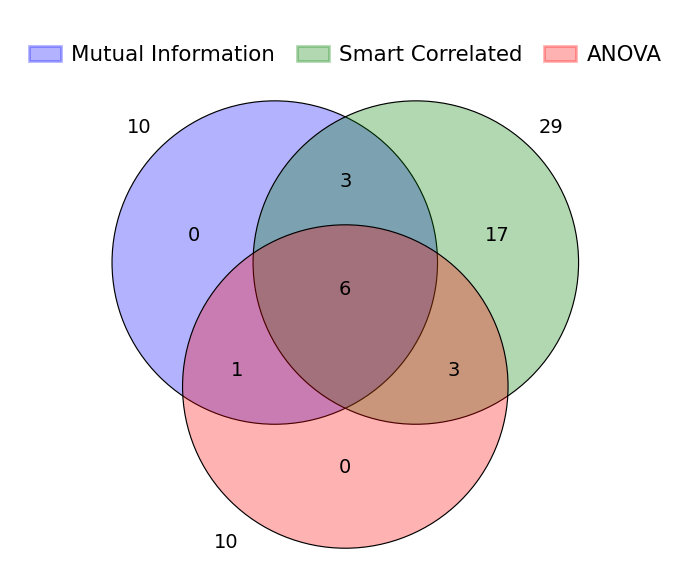

In [28]:
sets = {
    'Mutual Information': set(mutual_information_features),
    'Smart Correlated': set(drop_correlated_features),
    'ANOVA': set(anova_correlated_features)
}
# Gerar o diagrama de Venn
venny4py(sets=sets)

In [29]:
set(mutual_information_features).intersection(drop_correlated_features,anova_correlated_features)

{'Age',
 'OverTime',
 'StockOptionLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

### Hyperparameter tuning and cross-validation

- Next steps to be taken:

1.    Tune model hyperparameters
2.    Perform cross-validation
3.    Plot ROC curves
4.    Make a confusion matrix
5.    Get precision, recall and F1-score metrics
6.    Find the most important model features

In [30]:
# 1. Tune model hyperparameters by hand
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 84.35%


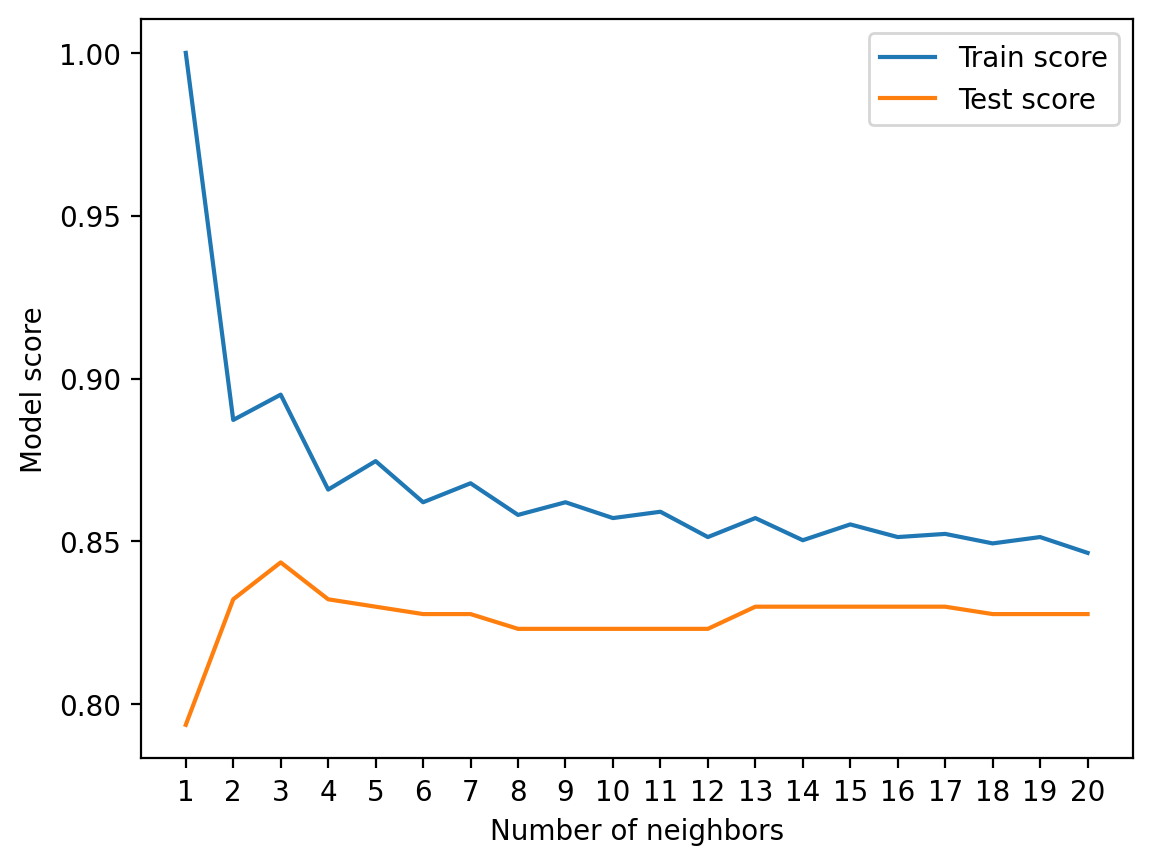

In [31]:
#visualizing the scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning models with with RandomizedSearchCV

In [32]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
# Setup random seed
np.random.seed(90)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8435374149659864

In [36]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

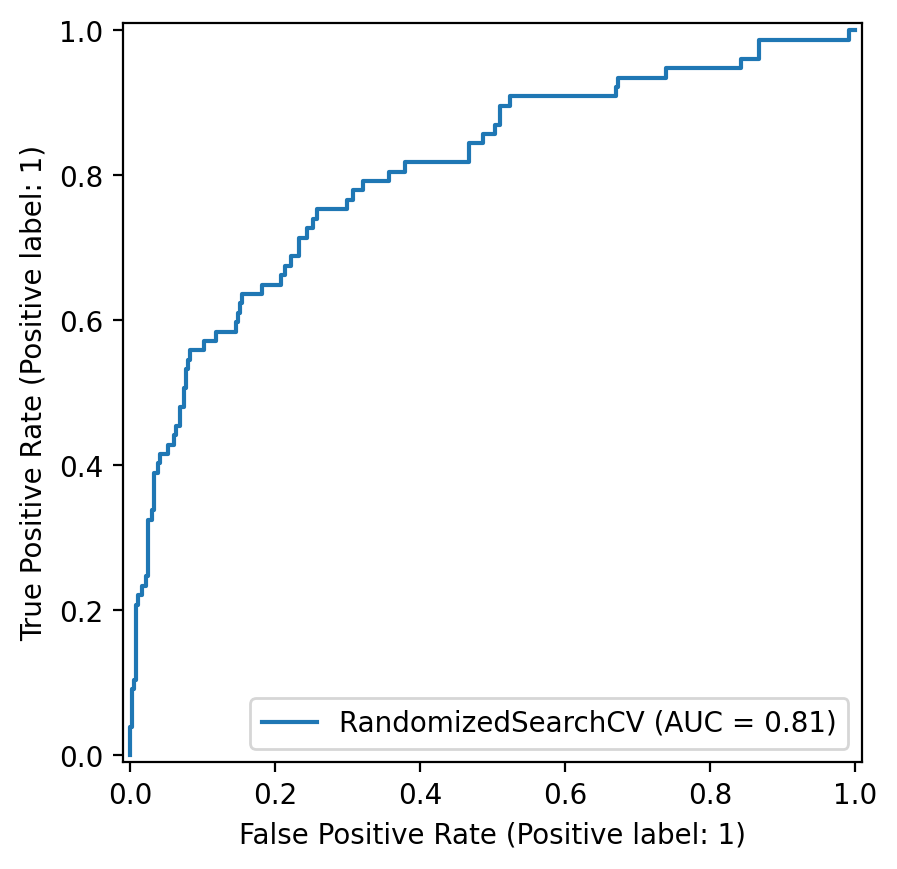

In [37]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)

In [38]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[361   3]
 [ 66  11]]


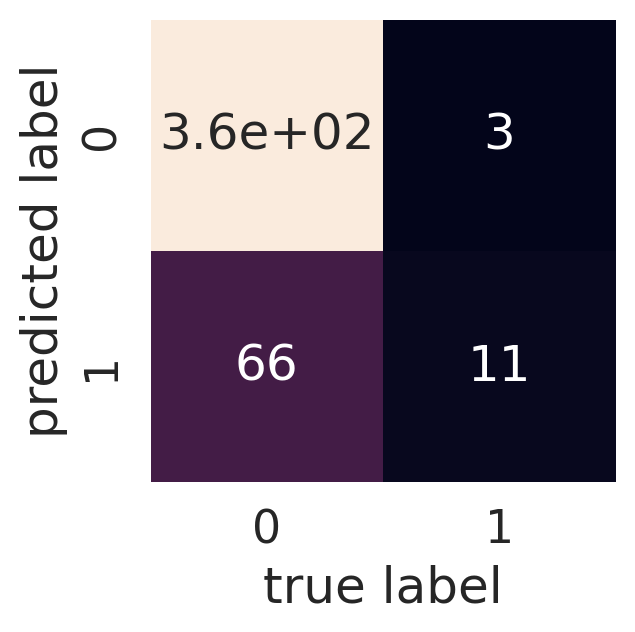

In [39]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [40]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       364
           1       0.79      0.14      0.24        77

    accuracy                           0.84       441
   macro avg       0.82      0.57      0.58       441
weighted avg       0.84      0.84      0.80       441



In [41]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [42]:
# we now check for close values using Grid Search CV
# Create the parameter grid based on the results of random search
param_grid = { 'bootstrap': [True],
              'max_depth': [145, 150, 155, 160], 
              'min_samples_leaf': [1,2,3], 
              'min_samples_split': [9, 10, 11],
              'n_estimators': [150, 175, 200, 225, 250]} 

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Grid Search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [45]:
# Results on the Grid Search

In [46]:
# Fit random hyperparameter search model
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [47]:
# Evaluate the randomized search random forest model
grid_search.score(X_test, y_test)

0.8412698412698413

In [48]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 145,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 200}

In [49]:
# Make preidctions on test data
y_preds = grid_search.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

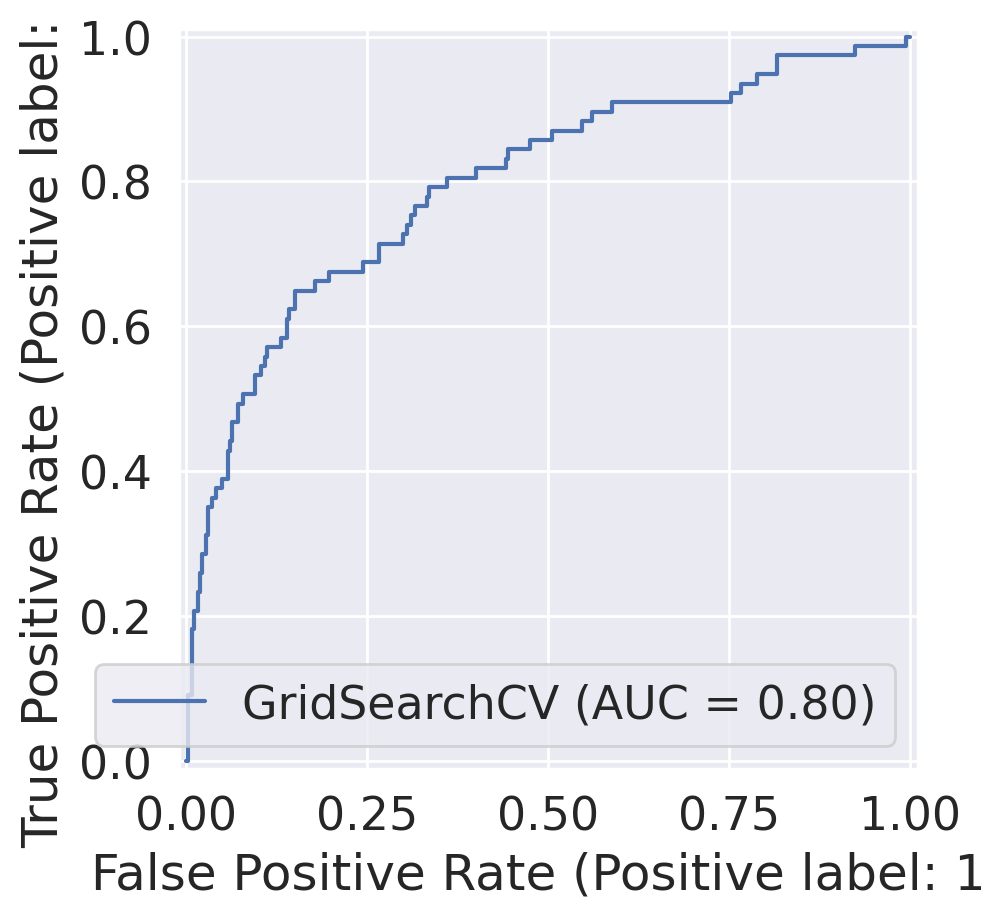

In [50]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(grid_search, X_test, y_test);

In [51]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[361   3]
 [ 67  10]]


In [52]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       364
           1       0.77      0.13      0.22        77

    accuracy                           0.84       441
   macro avg       0.81      0.56      0.57       441
weighted avg       0.83      0.84      0.79       441



In [53]:
# Hyperparameter Tuning done
# Best parameters found above
# Using these parameters on our Random Forest model for most optimal results
best_rf = RandomForestClassifier(bootstrap=True, 
                                 max_depth=145, 
                                 min_samples_leaf=1,
                                 min_samples_split=9, 
                                 n_estimators=200,
                                 random_state=42)

In [54]:
best_rf.fit(X_train, y_train);

In [55]:
# Finding the importance of each feature in the model
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)

In [56]:
print(feature_imp)

MonthlyIncome               0.091960
OverTime                    0.076220
Age                         0.068996
DailyRate                   0.060485
DistanceFromHome            0.051901
TotalWorkingYears           0.050987
HourlyRate                  0.047104
MonthlyRate                 0.046817
YearsAtCompany              0.040582
EnvironmentSatisfaction     0.033210
StockOptionLevel            0.032241
JobRole                     0.030692
YearsWithCurrManager        0.030205
TrainingTimesLastYear       0.029896
JobInvolvement              0.029618
NumCompaniesWorked          0.027799
YearsInCurrentRole          0.027673
EducationField              0.024555
PercentSalaryHike           0.024342
WorkLifeBalance             0.023360
MaritalStatus               0.023268
YearsSinceLastPromotion     0.022622
JobLevel                    0.022302
JobSatisfaction             0.019590
RelationshipSatisfaction    0.017492
Education                   0.016564
Department                  0.011915
B

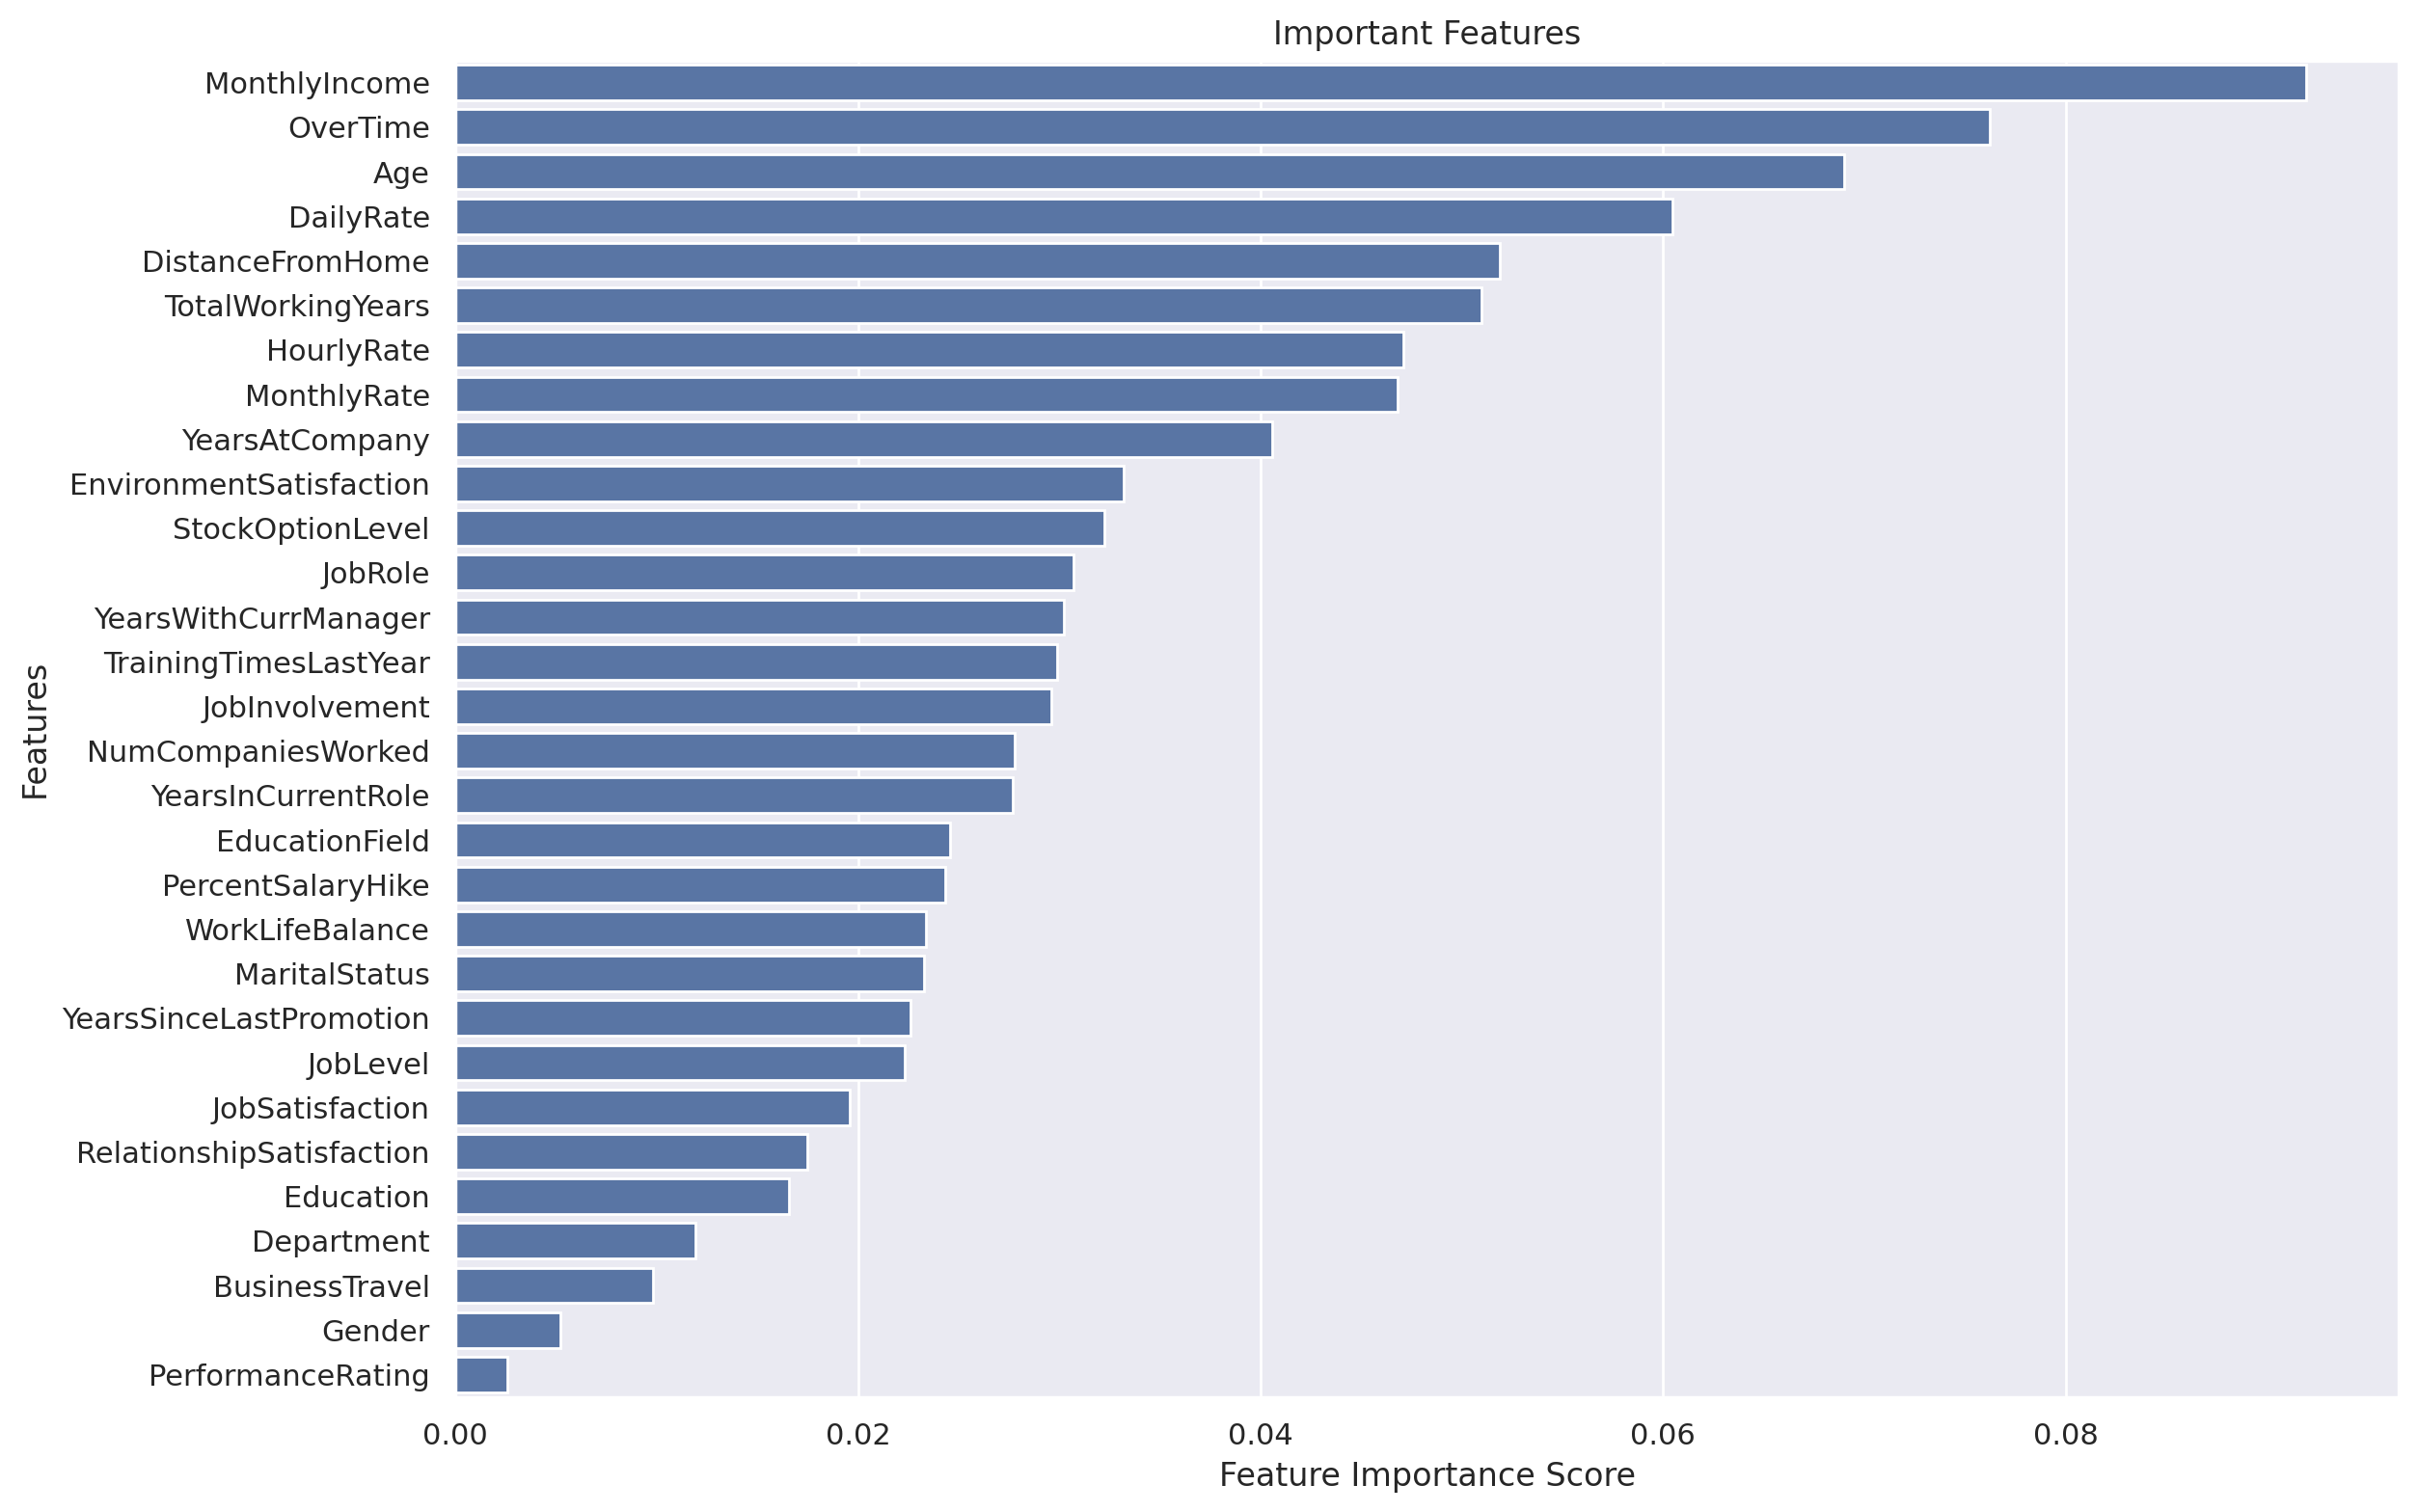

[CV] END bootstrap=True, max_depth=145, min_samples_leaf=1, min_samples_split=9, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=1, min_samples_split=9, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=1, min_samples_split=10, n_estimators=225; total time=   0.5s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=1, min_samples_split=11, n_estimators=225; total time=   0.4s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=2, min_samples_split=9, n_estimators=225; total time=   0.4s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=2, min_samples_split=11, n_estimators=175; total time=   0.3s
[CV] END bootstrap=True, max_depth=145, min_samples_leaf=3, min_samples_split=9, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=145, min_samples_

In [57]:
# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show() 